<a href="https://colab.research.google.com/github/Kriti-K/COMP8730_Assign03/blob/master/Regression_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Creating artificial dataset
N = 20 
X = np.random.random(N)*10 - 5 # generating 20 random values for X axis in the range -5 , +5 
print(X)

[ 3.15183228 -1.69813103 -4.99337891  4.72849224  3.2899301  -3.18821141
 -1.65354951 -0.3025353  -2.91270152  2.0276137   0.5733892  -3.93514263
  1.37119208 -2.28760441  3.25437544  2.96814181  0.07449608  4.73871232
  3.83506541  1.29241255]


In [ ]:
# need to give equation of a line + random gaussian noise 

Y = 0.5*X -1 + np.random.randn(N) # task of our model is to learn these values

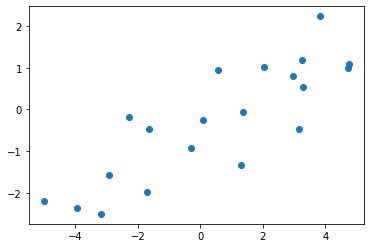

In [ ]:
plt.scatter(X,Y)

In [ ]:
#creating the model 
model = nn.Linear(1,1)

In [ ]:
# loss and optimizer

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.03, momentum=0.65) #adding nesterov was increasing the loss exponentially #adding momentum was also increasing loss slightly and adding bumps in the curve?

In [ ]:
#reshaping the data so we can convert it into tensors easily later 
X = X.reshape(N,1)
Y = Y.reshape(N,1)

In [ ]:
#since pytorch uses float32 type but numpy creates float64 data by default so we will have to convert type

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

#earlier type was np.ndArray, now it is torch.Tensor

In [ ]:

n_epochs = 60 #train the model, we can see it got static around 28 #no of iterations of the loop, we can manually run and see model fit for different values to reach correct value
losses = [] #list, each iteration we store value, help us see if training process converged, we will plot it

for ep in range(n_epochs):
  optimizer.zero_grad() #the parameter gradients that keep getting stored in backprop, clear those

  #forward pass 
  outputs = model(inputs)
  loss = criterion(outputs, targets) 

  # save losses to plot them later, loss will also be tensor type so need to convert it back to numpy
  losses.append(loss.item())

   #backward and optimize 
  loss.backward()
  optimizer.step() # takes one step of gradient descent 

  print(f'Epoch {ep+1}/{n_epochs} , Loss: {loss.item():.4f}')



Epoch 1/60 , Loss: 2.7480
Epoch 2/60 , Loss: 1.6596
Epoch 3/60 , Loss: 1.2517
Epoch 4/60 , Loss: 1.3146
Epoch 5/60 , Loss: 1.1278
Epoch 6/60 , Loss: 0.8275
Epoch 7/60 , Loss: 0.7077
Epoch 8/60 , Loss: 0.6854
Epoch 9/60 , Loss: 0.6296
Epoch 10/60 , Loss: 0.5710
Epoch 11/60 , Loss: 0.5529
Epoch 12/60 , Loss: 0.5514
Epoch 13/60 , Loss: 0.5434
Epoch 14/60 , Loss: 0.5358
Epoch 15/60 , Loss: 0.5351
Epoch 16/60 , Loss: 0.5362
Epoch 17/60 , Loss: 0.5354
Epoch 18/60 , Loss: 0.5345
Epoch 19/60 , Loss: 0.5347
Epoch 20/60 , Loss: 0.5349
Epoch 21/60 , Loss: 0.5347
Epoch 22/60 , Loss: 0.5345
Epoch 23/60 , Loss: 0.5345
Epoch 24/60 , Loss: 0.5345
Epoch 25/60 , Loss: 0.5344
Epoch 26/60 , Loss: 0.5344
Epoch 27/60 , Loss: 0.5344
Epoch 28/60 , Loss: 0.5344
Epoch 29/60 , Loss: 0.5343
Epoch 30/60 , Loss: 0.5343
Epoch 31/60 , Loss: 0.5343
Epoch 32/60 , Loss: 0.5343
Epoch 33/60 , Loss: 0.5343
Epoch 34/60 , Loss: 0.5343
Epoch 35/60 , Loss: 0.5343
Epoch 36/60 , Loss: 0.5343
Epoch 37/60 , Loss: 0.5343
Epoch 38/6

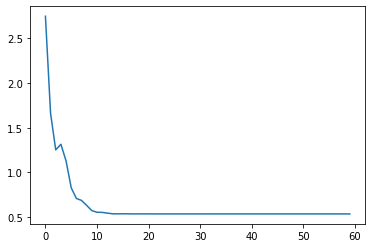

In [ ]:
plt.plot(losses)

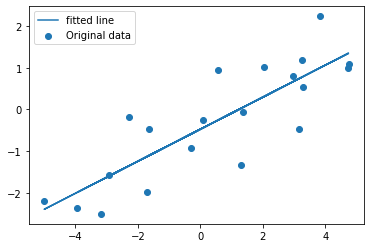

In [ ]:
#plot the graph 
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y, label='Original data')
plt.plot(X, predicted, label ='fitted line')
plt.legend()
plt.show()

In [ ]:
# we want to inspect the parameters of our model, to see if it is close to learning the parameters we wanted it to learn
w = model.weight.data.numpy()
b = model.bias.data.numpy()

print(w,b)

[[0.3849579]] [-0.47442922]
